In [49]:
%run utils.ipynb

In [2]:
%matplotlib inline
#%matplotlib notebook

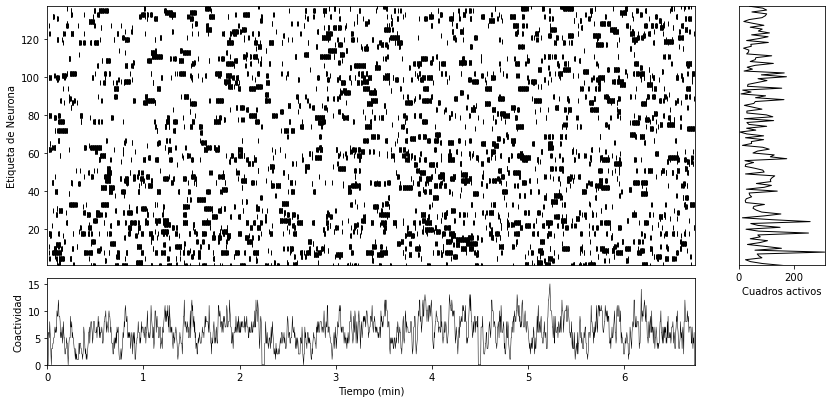

In [3]:
fps=4
raster = np.load("../data/DYS000000G_raster.npy").T
raster=np.delete(raster, np.where(np.sum(raster,axis=1)==0)[0],axis=0).copy()
plot_raster(raster,fps)
#plt.savefig('../figures/raster.svg', format='svg', dpi=300, transparent=True)

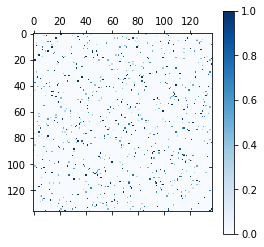

In [4]:
mapper = umap.UMAP(n_neighbors=5,min_dist=0.1,n_components=3,random_state=42,metric='correlation',).fit(raster)
ma=get_adj_matrix(mapper)
plt.matshow(ma,cmap='Blues')
plt.colorbar()
#plt.savefig('../figures/adj_matrix.svg', format='svg', dpi=300, transparent=True)
plt.show()

In [5]:
cluster_index,mat_mismo_grupo=get_clusters_modularidad(ma,n_iter=1000)
cluster_index=nuevo_cluster_index(cluster_index,[6,5,7,10,0,9,8,2,11,3,4,1])

Number of Ensembles:  12


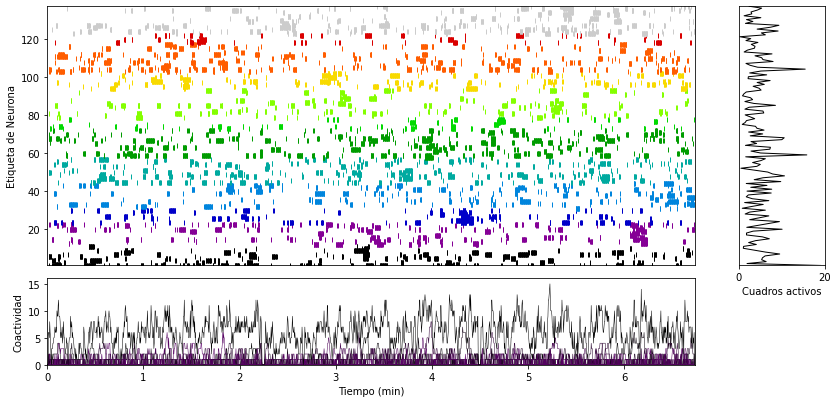

In [36]:
ord_plot_ch=plot_cluster_raster_h(raster,fps,cluster_index,name_colormap='nipy_spectral')
#plt.savefig('../figures/ensamble_raster.svg', format='svg', dpi=300,transparent=True)

In [24]:
test_coactivity_is_random(raster,cluster_index,1000)

Cluster 0
rt = -28.180311265434202
p = 1.0193492851278184e-174
alphahat 0.032
betahat 0.0

Cluster 1
rt = -27.627705039486813
p = 5.172398288442947e-168
alphahat 0.0
betahat 0.0

Cluster 2
rt = -29.8505818961336
p = 8.62740393056698e-196
alphahat 0.0
betahat 0.0

Cluster 3
rt = -27.894931928660583
p = 3.073816171109797e-171
alphahat 0.0
betahat 0.0

Cluster 4
rt = -25.529765179797266
p = 9.213165486037669e-144
alphahat 0.046
betahat 0.0

Cluster 5
rt = -27.08575792964039
p = 1.4490393218242777e-161
alphahat 0.069
betahat 0.0

Cluster 6
rt = -27.85515849966262
p = 9.328079683314589e-171
alphahat 0.0
betahat 0.0

Cluster 7
rt = -29.840978142141196
p = 1.1494816912713561e-195
alphahat 0.0
betahat 0.0

Cluster 8
rt = -28.428217117696104
p = 9.060960896992002e-178
alphahat 0.0
betahat 0.0

Cluster 9
rt = -27.267216803845013
p = 1.0387281846030746e-163
alphahat 0.054
betahat 0.0

Cluster 10
rt = -29.566526614383154
p = 4.026972859407682e-192
alphahat 0.0
betahat 0.0

Cluster 11
rt = -27.5610

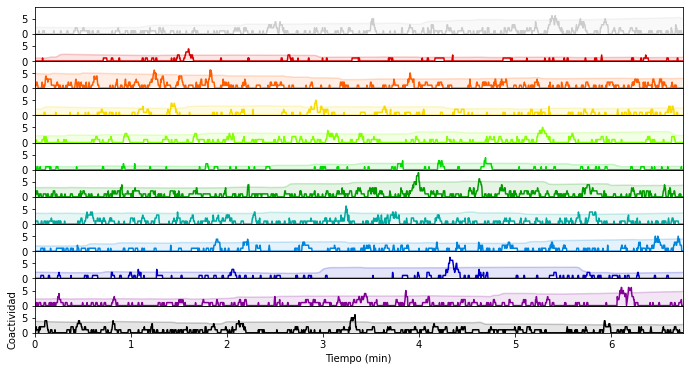

In [35]:
plot_coactivity_ensambles(raster,cluster_index,1000,'nipy_spectral',fps,20,3)
#plt.savefig('../figures/coactivity_ensamble_rasters.svg', format='svg', dpi=300,transparent=True)

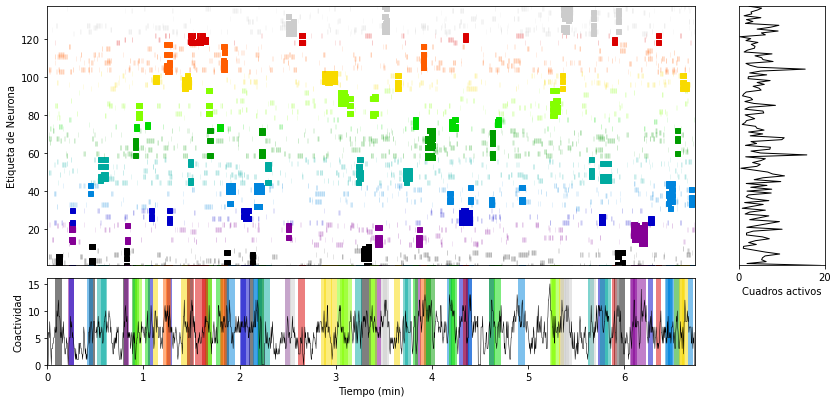

In [40]:
ord_plot_ch,ensembles_in_time=plot_ensamble_raster(raster,fps,cluster_index,'nipy_spectral',3,20,5)
#plt.savefig('../figures/ensamble_raster.svg', format='svg', dpi=300,transparent=True)

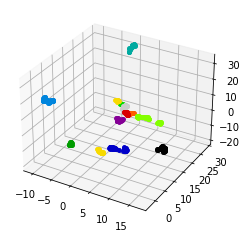

In [44]:
mapper_cols,color_to_plot,colores=get_3D_projection_vectors(raster,cluster_index,'nipy_spectral',20,3,0.5,42,'euclidean')
#plt.savefig('../figures/proj_cols.svg', format='svg', dpi=300,transparent=True)

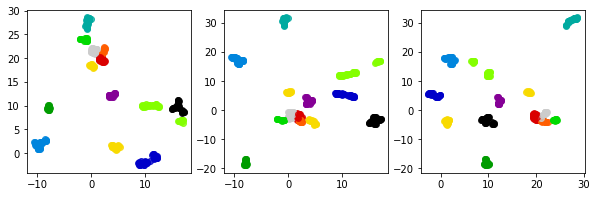

In [46]:
cmap = matplotlib.cm.get_cmap('nipy_spectral')
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(131)
for i in range(mapper_cols.embedding_.shape[0]):
    if type(cmap)==matplotlib.colors.LinearSegmentedColormap:
        ax.scatter(mapper_cols.embedding_[i, 0], mapper_cols.embedding_[i, 1],color=cmap(color_to_plot[i]/max(color_to_plot)),alpha=0.8)
    else:
        ax.scatter(mapper_cols.embedding_[i, 0], mapper_cols.embedding_[i, 1],color=cmap(color_to_plot[i]),alpha=0.8)
    
ax = fig.add_subplot(132)
for i in range(mapper_cols.embedding_.shape[0]):
    if type(cmap)==matplotlib.colors.LinearSegmentedColormap:
        ax.scatter(mapper_cols.embedding_[i, 0], mapper_cols.embedding_[i, 2],color=cmap(color_to_plot[i]/max(color_to_plot)),alpha=0.8)
    else:
        ax.scatter(mapper_cols.embedding_[i, 0], mapper_cols.embedding_[i, 2],color=cmap(color_to_plot[i]),alpha=0.8)
    
ax = fig.add_subplot(133)
for i in range(mapper_cols.embedding_.shape[0]):
    if type(cmap)==matplotlib.colors.LinearSegmentedColormap:
        ax.scatter(mapper_cols.embedding_[i, 1], mapper_cols.embedding_[i, 2],color=cmap(color_to_plot[i]/max(color_to_plot)),alpha=0.8)
    else:
        ax.scatter(mapper_cols.embedding_[i, 1], mapper_cols.embedding_[i, 2],color=cmap(color_to_plot[i]),alpha=0.8)

#plt.savefig('../figures/planes_proj_columns.svg', format='svg', dpi=300,transparent=True)

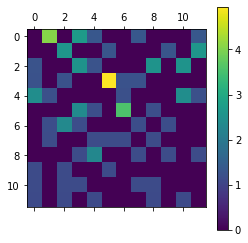

In [50]:
transition_matrix=get_transition_matrix(colores,cluster_index)
plt.matshow(transition_matrix)
plt.colorbar()

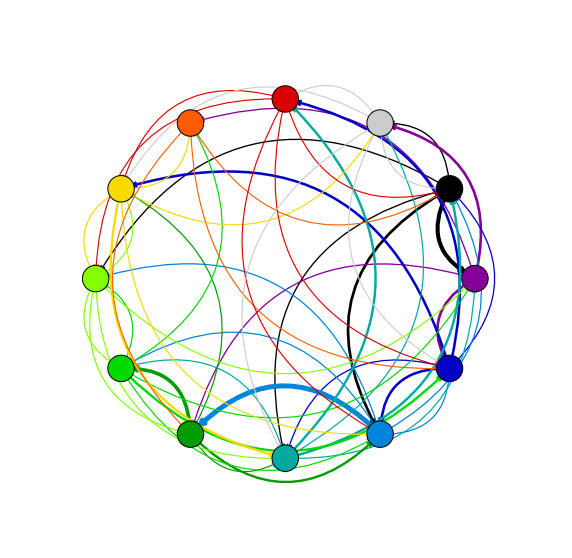

In [51]:
G,color_map=get_transition_graph(transition_matrix,cmap)
default_pos = nx.circular_layout(G)

new_pos={}
new_pos[0]=default_pos[1]
new_pos[1]=default_pos[0]
new_pos[2]=default_pos[11]
new_pos[3]=default_pos[10]
new_pos[4]=default_pos[9]
new_pos[5]=default_pos[8]
new_pos[6]=default_pos[7]
new_pos[7]=default_pos[6]
new_pos[8]=default_pos[5]
new_pos[9]=default_pos[4]
new_pos[10]=default_pos[3]
new_pos[11]=default_pos[2]

edge_weight = [G[edge[0]][edge[1]]["weight"] for edge in G.edges()]
edge_colors = [G[edge[0]][edge[1]]["color"] for edge in G.edges()]

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos=new_pos,node_color=color_map,node_size=700,edgecolors='black')
nx.draw_networkx_edges(G, pos=new_pos, width=edge_weight,edge_color=edge_colors,connectionstyle="arc3,rad=0.5",
                      arrowstyle='->')
plt.box(False)
#plt.savefig('../figures/graph_sequences_ensembles.svg', format='svg', dpi=300,transparent=True)
plt.show()